<a href="https://colab.research.google.com/github/NatBiscarra/challenge_TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Extração dos dados

In [1]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Leitura dos dados
df = pd.read_json('/content/TelecomX_Data.json')
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 2. Transformação

### Verificar inconsistências nos dados

In [3]:
#Definindo função para que os dados sejam "desaninhados" em um dataframe
def processador_dados(json_path):
  df =pd.read_json(json_path) #lê e converte os dados em DF e armazena na variável
  campos = ['customer', 'phone', 'internet', 'account'] #cria lista com nomes das colunas com dados aninhados
  dfs_expand = [pd.json_normalize(df[col]) for col in campos] #normaliza os dados criando novas colunas em um novo DF
  return pd.concat([df[['customerID', 'Churn']]] + dfs_expand, axis=1) #retorna concatenando um DF com as duas primeiras colunas + DF normalizado

dados_limpos = processador_dados('/content/TelecomX_Data.json') #nova variável com dados tratados

In [4]:
dados_limpos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Renomear colunas com letras minúsculas e underscores

In [5]:
dados_limpos.rename(columns={'Charges.Monthly': 'monthly_charges',
                             'Charges.Total': 'total_charges'}, inplace=True)


In [6]:
dados_limpos.columns = (
    dados_limpos.columns
    .str.strip()
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

In [7]:
#Verificar se há dados nulos (nans)
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [8]:
#Verifica se há espaços em branco e substitui por np.nan
dados_limpos['total_charges'] = dados_limpos['total_charges'].replace(' ', np.nan)

#Converte os dados da coluna em float
dados_limpos['total_charges'] = dados_limpos['total_charges'].astype(float)
dados_limpos['total_charges'] = dados_limpos['total_charges'].astype(np.float64)

#Visualiza as informações
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

Verificar duplicatas

In [9]:
#Retorna True (1) ou False(0) para ducplicatas na coluna "customer_id"
dados_limpos['customer_id'].duplicated().sum()

np.int64(0)

Verificar os tipos de dados

In [10]:
dados_limpos.dtypes

,0
customer_id,object
churn,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object


Verificar valores ausentes (NaN)

In [11]:
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [12]:
#Verifica quais registros de 'total_charges' estão com NaN
dados_limpos.query('monthly_charges == 0 | total_charges == 0')

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges


In [13]:
#Seleciona todas as linhas em que 'total_charges' possui valores nulos ou ausentes.
dados_limpos[dados_limpos['total_charges'].isnull()]

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Como o campo ``'tenure'`` está em 0, significa que o cliente acabou de entrar (justifica o campo  vazio). Por isso, como não há um valor informativo útil de ``'totalcharges'`` (e preencher com 0 poderia criar um dado falso), foram removidos os 11 registros com dados ausentes no ``'totalcharges'``.


In [14]:
#Remove os valores nulos da coluna
dados_limpos = dados_limpos.dropna(subset=['total_charges'])

In [15]:
#Verifica novamente
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


### Erros de formatação em categorias

In [16]:
#Inspeciona as colunas do tipo objeto e lista valores únicos em cada
for col in dados_limpos.select_dtypes(include='object').columns: #.columns funciona como índice
    print(f"{col}: {dados_limpos[col].unique()}") #printa a coluna e seus valores

customer_id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [17]:
#Remove os valores vazios, pois não são informativos
dados_limpos = dados_limpos[dados_limpos['churn'] != '']

In [18]:
dados_limpos[dados_limpos['churn'] == '']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges


### Inconsistências nas categorias

In [19]:
#Verifica a frequência de cada valor na coluna
dados_limpos['senior_citizen'].value_counts()

,count
senior_citizen,
0,5890
1,1142


In [20]:
#Cria a coluna 'contas_diarias" para calcular o gasto médio por dia com base no valor mensal
dados_limpos['contas_diarias'] = dados_limpos['monthly_charges'] / 30
dados_limpos[['monthly_charges', 'contas_diarias']].head(10)

/tmp/ipython-input-20-912231545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['contas_diarias'] = dados_limpos['monthly_charges'] / 30


,monthly_charges,contas_diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
5,69.40,2.313333
6,109.70,3.656667
7,84.65,2.821667
8,48.20,1.606667
9,90.45,3.015000


In [21]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   object 
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   object 
 5   dependents         7032 non-null   object 
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   object 
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

### Padronização e transofrmação de dados

In [22]:
#Cria uma lista com os nomes das colunas que contêm valores "Yes" e "No"
cols_sim_nao = ['churn', 'partner', 'dependents', 'phone_service', 'paperless_billing']

#Substitui "Yes" e "No" por 1 e 0
dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-22-866149730.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-22-866149730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})


In [23]:
#Cria uma lista com as colunas que contêm "No internet service" e "No phone service"
no_service_cols = [
    'multiple_lines', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

#Substitui por "No"
dados_limpos[no_service_cols] = dados_limpos[no_service_cols].replace({
    'No internet service': 'No', 'No phone service': 'No'
})

In [24]:
#Visualiza o DF
dados_limpos.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [25]:
#Visualiza as informações sobre os dados
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

# 3. Carga e Análise

### **Análise descritiva - Estatísticas descritivas para os dados numéricos**

In [26]:
#Resumo estatístico do DF
dados_limpos.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


1. Proporção de Evasão (Churn):

  **Média (churn): 0.265** → Cerca de 26,6% dos clientes cancelaram o serviço.

    > 💡Taxa relativamente alta, indicando um problema de retenção de clientes.


2. Tempo como Cliente (Tenure):

  **Média: 32,42 meses**

  **Mediana: 29 meses**

  **Máximo: 72 meses**

  **Míninmo: 1 mês**

    > 💡Boa parte dos clientes permanece por mais de 2 anos, mas também há muitos com permanência muito curta, o que pode sugerir rotatividade precoce em certos perfis.



3. Gastos Mensais e Totais

```
  Variável	        Média	      Mediana	   Mínimo	    Máximo
monthly_charges	  R$ 64,80	   R$ 70,35	 R$ 18,25	  R$ 118,75
total_charges	 R$ 2.283,30	R$ 1.397,48	 R$ 18,80    R$ 8.684,80
contas_diarias	    R$ 2,16	    R$ 2,35	  R$ 0,61	    R$ 3,96
```

  > 💡 Clientes com mensalidades mais altas tendem a ter maior risco de evasão. Essa hipótese pode ser testada nas próximas análises.



4. Perfil Demográfico e de Serviço

  **Idosos (senior_citizen):** Apenas 16% dos clientes têm 65 anos ou mais.

  **Com parceiro(a):** ~48%

  **Com dependentes:** ~30%

  **Com serviço telefônico:** ~90%

  **Fatura digital (paperless_billing):** ~59%

  > 💡 A maioria dos clientes não são idosos, não tem dependentes e utiliza cobrança digital. Esses fatores podem ter relação com o 'churn' dependendo da combinação com outras variáveis (como tipo de contrato ou método de pagamento).



Análise da coluna 'tenure' (tempo como cliente)

Avalia o tempo médio e mediano que os clientes permanecem na empresa. Essa métrica é útil para entender a fidelidade média dos clientes e se há tendência de evasão em ciclos curtos.

In [27]:
print(f"Tempo médio como cliente: {dados_limpos['tenure'].mean():.2f}")
print(f"Mediana do tempo:  {dados_limpos['tenure'].median():.2f}")

Tempo médio como cliente: 32.42
Mediana do tempo:  29.00


Investigar o valor financeiro investido pelos clientes mensalmente e ao longo de sua jornada.

Faturas muito altas podem indicar risco de evasão, enquanto valores baixos podem sugerir menor engajamento.

In [28]:
print(f"Fatura mensal média: {dados_limpos['monthly_charges'].mean():.2f}")
print(f"Gasto total médio: {dados_limpos['total_charges'].mean():.2f}")

Fatura mensal média: 64.80
Gasto total médio: 2283.30


Identifica a proporção de clientes que permaneceram *vs*. cancelaram o serviço.

Essa métrica é crucial para entender o problema: *Quanto maior a taxa de evasão, maior a necessidade de estratégias de retenção*.

In [29]:
dados_limpos['churn'].value_counts(normalize=True) * 100


,proportion
churn,
0,73.421502
1,26.578498


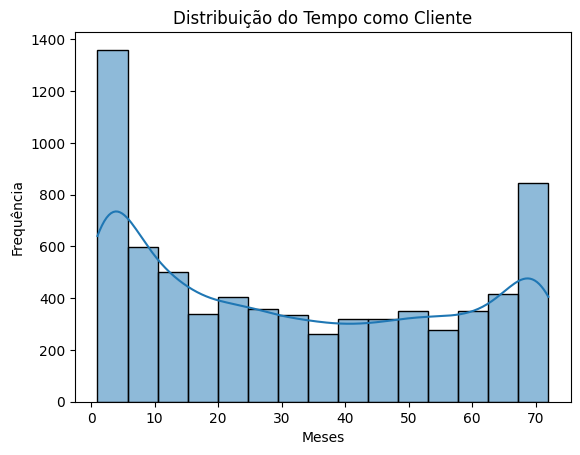

In [30]:
#Histograma para visualizar a dsitribuição do tempo como cliente
sns.histplot(dados_limpos['tenure'], kde=True)
plt.title("Distribuição do Tempo como Cliente")
plt.xlabel("Meses")
plt.ylabel("Frequência")
plt.show()

### **Distribuição da Evasão**

Visualização da Evasão de Clientes (Churn)

A seguir, dois gráficos que ilustram a distribuição da variável churn, responsável por indicar se o cliente deixou ou permaneceu na empresa:

*   **Gráfico de Barras:** mostra a contagem absoluta de clientes que saíram (1) e que permanceram (0);

*   **Gráfico de Pizza:** mostra a proporção percentual entre os dois grupos.


Distribuição Absoluta Distribuição Percentual

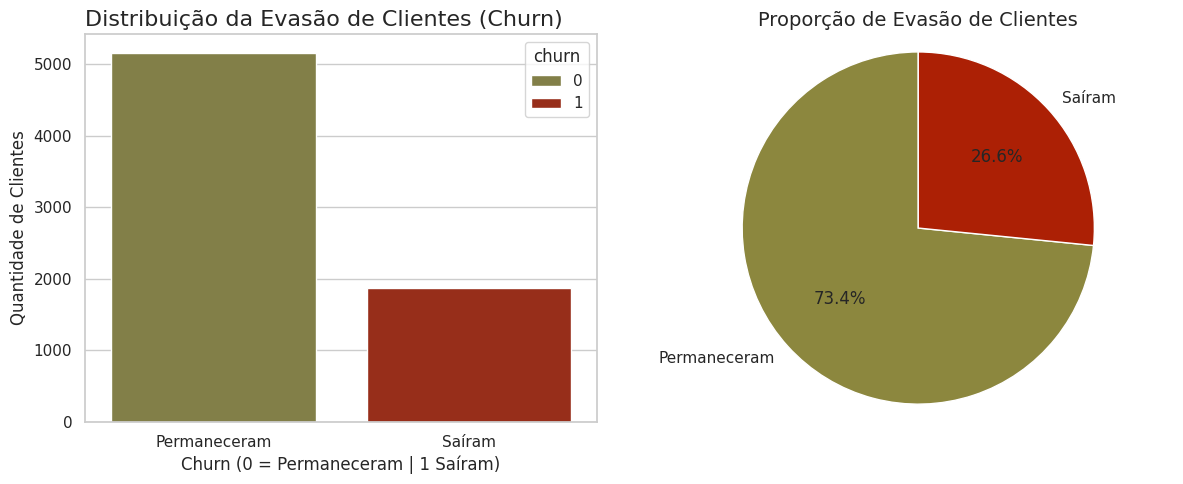

In [45]:
#Gráfico em pizza
churn_counts = dados_limpos['churn'].value_counts()
labels = ['Permaneceram', 'Saíram']
colors = ['#8c873e', '#ac2005']

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(12,5))

#Gráfico em barras
colors_barras = ['#8c873e', '#ac2005']
sns.countplot(x='churn', data=dados_limpos, hue='churn', palette=colors_barras, ax=axes[0])
axes[0].set_title('Distribuição da Evasão de Clientes (Churn)', loc='left', fontsize=16)
axes[0].set_xlabel('Churn (0 = Permaneceram | 1 Saíram)', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(labels)


axes[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proporção de Evasão de Clientes', fontsize=14)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

> 📌 Os gráficos acima revelam que cerca de 26,6% dos clientes saíram da empresa, enquanto 73,4% permaneceram.



### **Contagem de Evasão por Variáveis Categóricas**

Essa etapa busca identificar padrões na evasão de clientes ao analisar variáveis categóricas, como gênero, tipo de contrato e método de pagamento. A ideia é compreender se certos perfis têm maior probabilidade de cancelar o serviço, permitindo direcionar estratégias mais eficazes para retenção.

In [32]:
#Dicionário para deixar os rótulos mais legíveis
nomes_legiveis = {
    'gender': 'Gênero',
    'contract': 'Tipo de Contrato',
    'payment_method': 'Forma de Pagamento',
    'internet_service': 'Serviço de Internet',
    'streaming_tv': 'Streaming de TV',
    'multiple_lines': 'Linhas Telefônicas',
    'churn': 'Evasão',
}

Gerar gráficos que mostram a distribuição absoluta de clientes que cancelaram o serviço.

In [33]:
#Função para plotar gráficos
def plot_churn_plotly(col):
    # Substitui os valores binários para legenda
    dados_plot = dados_limpos.copy()
    dados_plot['churn'] = dados_plot['churn'].replace({0: 'Permaneceram', 1: 'Saíram'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceram': '#8c873e', 'Saíram': '#ac2005'},
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Status do Cliente'
        }
    )

    fig.update_layout(

        title=f'Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title=nomes_legiveis.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()

Gerar gráficos que mostram a distribuição absoluta de clientes que cancelaram o serviço.

In [34]:
#Função para plotar gráficos
def plot_churn_plotly(col):
    # Substitui os valores binários para legenda
    dados_plot = dados_limpos.copy()
    dados_plot['churn'] = dados_plot['churn'].replace({0: 'Permaneceram', 1: 'Saíram'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceram': '#8c873e', 'Saíram': '#ac2005'},
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Status do Cliente'
        }
    )

    fig.update_layout(

        title=f'Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title=nomes_legiveis.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()

Visualização da proporção de clientes que cancelaram o serviço, permitindo uma análise clara da taxa de churn e possíveis tendências.

In [46]:
#Função para plotar gráficos
def plot_churn_percent_plotly(col):
    # Cópia dos dados
    df = dados_limpos.copy()

    # Agrupar e calcular a proporção de churn = 1
    proporcao = (
        df.groupby(col)['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=True)
    )
    proporcao['churn'] *= 100  # converter para %

    # Gráfico com Plotly horizontal
    fig = px.bar(
        proporcao,
        x='churn',
        y=col,
        orientation='h',
        text='churn',
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Evasão (%)'
        },
        color='churn',
        color_continuous_scale='Reds'
    )

    fig.update_layout(

        title=f'Proporção de Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title='Evasão (%)',
        yaxis_title=nomes_legiveis.get(col, col).title(),
        coloraxis_showscale=False
    )

    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()

**Evasão por Tipo de Contrato**

Como pode ser observado o Tipo de Contrato mês a mês (Month-to-Month) tem a maior insidência de cancelamentos.

In [36]:
plot_churn_plotly('contract')

Observa-se que clientes com contratos mês a mês apresentam a maior taxa de churn, destacando a vulnerabilidade desse grupo em comparação com outras formas de contratação.

In [37]:
plot_churn_percent_plotly('contract')

**Evasão por Forma de pagamento**

O Cheque eletrônico está com maior indice de evasão. Com 45% das evasões dos clientes.

In [38]:
plot_churn_plotly('payment_method')
plot_churn_percent_plotly('payment_method')

**Evasão por Serviço de Internet**

A fibra optica consiste com a maior taxa de evasão.

In [39]:
plot_churn_plotly('internet_service')
plot_churn_percent_plotly('internet_service')

**Evasão por Gênero**

As mulheres apresentam um número um pouco maior de evasão em relação aos homens.

In [40]:
df = dados_limpos.copy()

genero_churn = (
        df.groupby('gender')['churn']
        .mean()
        .reset_index()
        .sort_values('churn', ascending=False)
    )
genero_churn['churn'] *= 100

fig = px.bar(
        genero_churn,
        x='gender',
        y='churn',
        text='churn',
        labels={'gender': 'Gênero', 'churn': 'Evasão (%)'},
        color='churn',
        color_continuous_scale='Reds'
    )

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(
        title='Proporção de Evasão por Gênero',
        yaxis_title='Evasão (%)',
        xaxis_title='Gênero',
        coloraxis_showscale=False
    )

fig.show()

### **Contagem de Evasão por Variáveis Numéricas**

Nesta seção, são comparadas a distribuição de quatro variáveis numéricas entre clientes que permaneceram e os que cancelaram seus serviços (churn).

São elas:
*   tenure
*   monthly_charges
*   contas_diarias

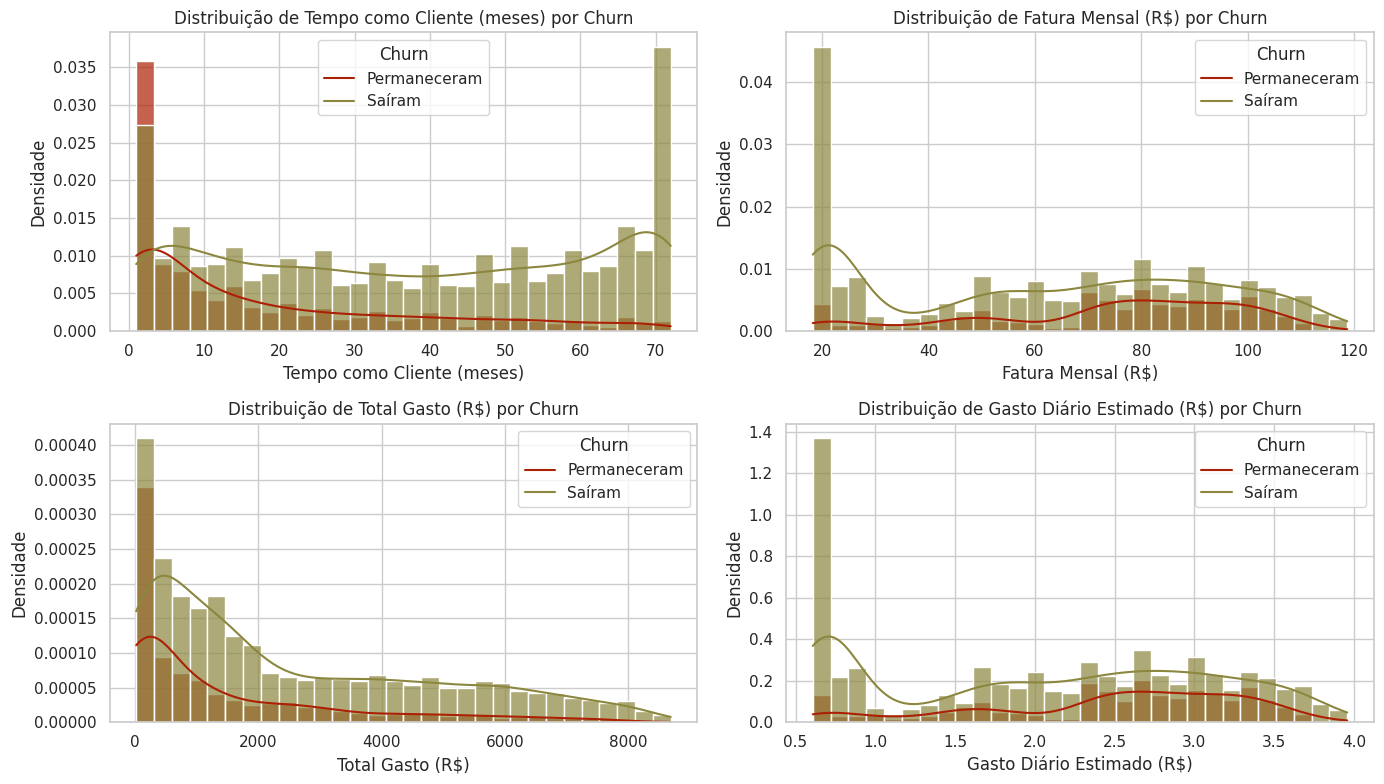

In [52]:
variaveis = ['tenure', 'monthly_charges', 'total_charges', 'contas_diarias']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'monthly_charges': 'Fatura Mensal (R$)',
    'total_charges': 'Total Gasto (R$)',
    'contas_diarias': 'Gasto Diário Estimado (R$)'
}

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # facilita iteração

# Gerar os 4 gráficos
colors_barras = ['#8c873e', '#ac2005']
for i, col in enumerate(variaveis):
    sns.histplot(
        data=dados_limpos,
        x=col,
        hue='churn',
        kde=True,
        palette=colors_barras,
        bins=30,
        stat='density',
        alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuição de {titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel(titulos[col])
    axes[i].set_ylabel('Densidade')
    axes[i].legend(title='Churn', labels=['Permaneceram', 'Saíram'])

plt.tight_layout()
plt.show()


Essa análise ajuda a entender como o comportamento financeiro e o tempo de permanência impactam a evasão.

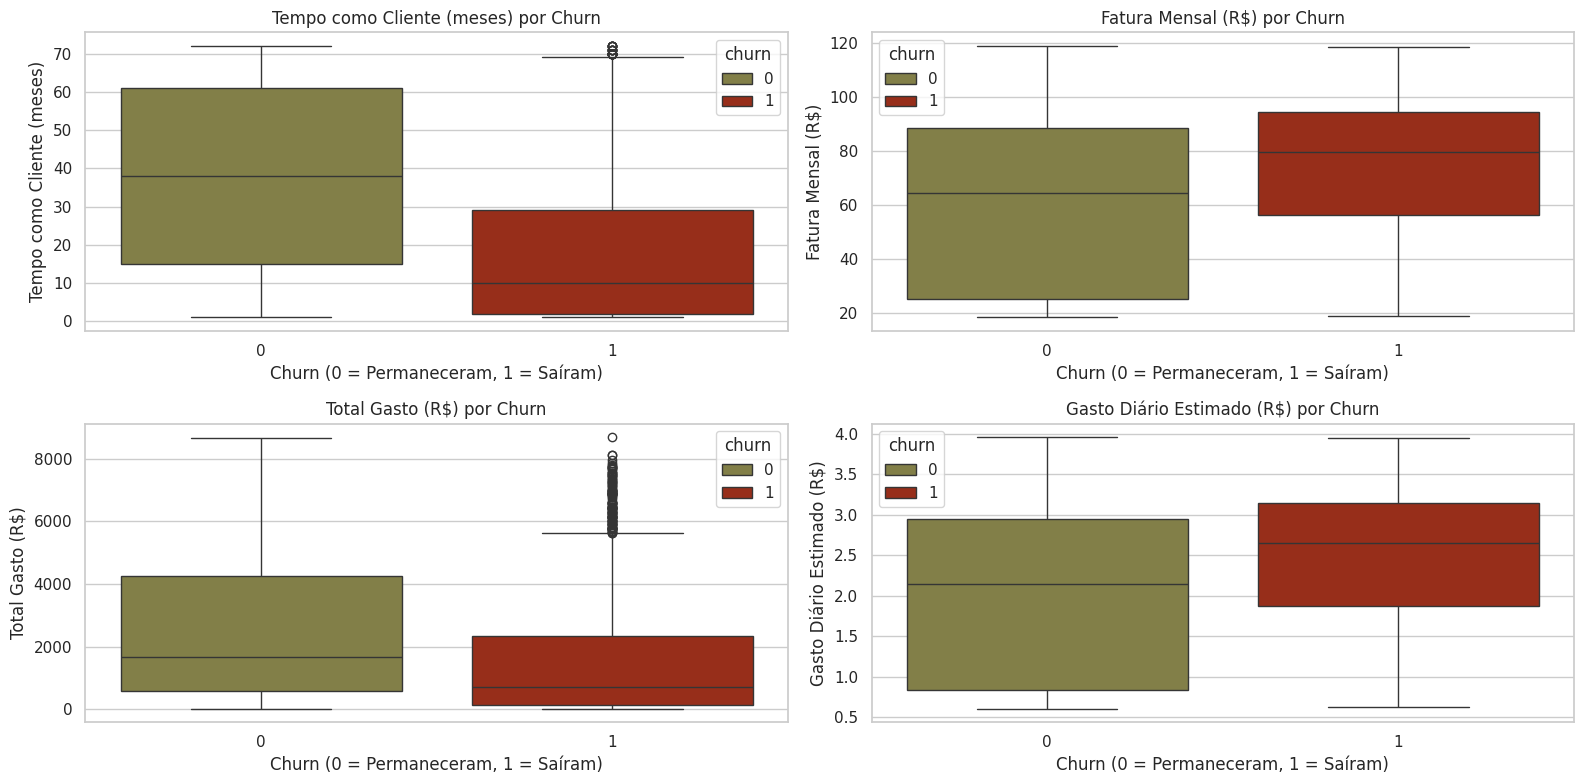

In [54]:
variaveis = ['tenure', 'monthly_charges', 'total_charges', 'contas_diarias']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'monthly_charges': 'Fatura Mensal (R$)',
    'total_charges': 'Total Gasto (R$)',
    'contas_diarias': 'Gasto Diário Estimado (R$)'
}

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

# Geração dos boxplots
colors_plots = ['#8c873e', '#ac2005']
for i, col in enumerate(variaveis):
    sns.boxplot(
        data=dados_limpos,
        x='churn',
        y=col,
        hue='churn',
        palette=colors_plots,
        ax=axes[i]
    )
    axes[i].set_title(f'{titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0 = Permaneceram, 1 = Saíram)')
    axes[i].set_ylabel(titulos[col])

plt.tight_layout()
plt.show()

### Extra: Análise de Correlação entre Variáveis

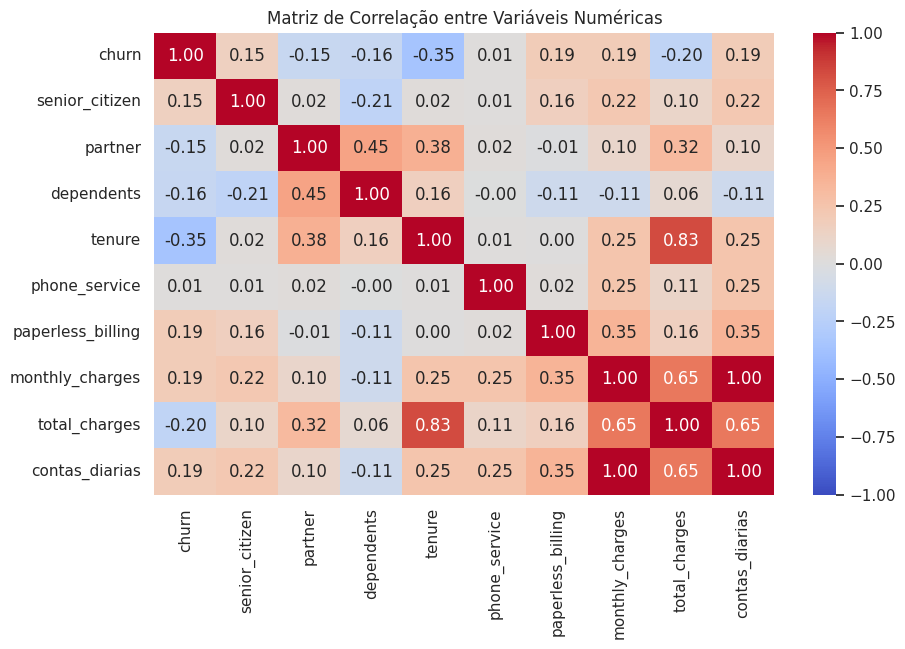

In [43]:
# Seleciona apenas colunas numéricas
df_corr = dados_limpos.select_dtypes(include=['int64', 'float64'])

# Calcula correlação
correlacoes = df_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

**tenure:** correlação negativa → quanto mais tempo de casa, menor a chance de churn.

**total_charges:** também negativa → clientes antigos gastaram mais e tendem a ficar.

**monthly_charges ou contas_diarias:** correlação positiva leve → quem paga mais, tende a sair mais.

In [44]:
correlacoes_churn = correlacoes['churn'].sort_values(key=abs, ascending=False)
print(correlacoes_churn)


churn                1.000000
tenure              -0.354049
total_charges       -0.199484
contas_diarias       0.192858
monthly_charges      0.192858
paperless_billing    0.191454
dependents          -0.163128
senior_citizen       0.150541
partner             -0.149982
phone_service        0.011691
Name: churn, dtype: float64


# **Relatório Final**

### Análise de Evasão de Clientes (Churn) - TelecomX

A Telecom X enfrenta um alto índice de cancelamentos de clientes. Para melhorar a retenção, é necessário compreender os fatores que influenciam esse comportamento de evasão, conhecido como churn.

Este projeto teve como objetivo analisar os dados de clientes da empresa para identificar padrões e possíveis causas de cancelamento, com foco em variáveis demográficas, contratuais e de consumo.

### Limpeza e Tratamento de Dados 🧹

Foram seguidos os seguintes passos para preparar os dados:


*   Importação de dados JSON via API simulada.
*   Normalização de colunas aninhadas (customer, phone, internet, account).
*   Remoção de registros com valores ausentes, especialmente em TotalCharges e Churn.
*   Conversão de variáveis binárias de "Yes"/"No" para 1/0.
*   Padronização de nomes de colunas para o formato snake_case (ex: total_charges).
*   Criação da variável derivada contas_diarias, com base no gasto mensal.

### Análise Exploratória de Dados (EDA) 🔎

A seguir, apresentamos os principais resultados exploratórios, divididos em categorias:

🎯 Distribuição Geral do Churn

*   Cerca de 26,6% dos clientes cancelaram seus serviços.
*   Gráficos de barras e pizza evidenciam o problema de retenção.


📋 Churn por Variáveis Categóricas

Foi analisada a evasão por variáveis como tipo de contrato, forma de pagamento, internet_service, entre outras.

Principais achados:

*   Clientes com contrato mensal têm alta taxa de churn.
*   Formas de pagamento como "Electronic Check" estão mais associadas à evasão.
*   Clientes que não possuem serviços extras (como tech_support, online_security) tendem a sair com mais frequência.

As análises incluíram gráficos interativos com Plotly e proporções (%) por grupo.


📈 Churn por Variáveis Numéricas

Foram analisadas variáveis como:

*   tenure → tempo como cliente
*   monthly_charges → gasto mensal
*   total_charges → gasto total acumulado
*   contas_diarias → gasto diário estimado

Padrões observados:

*   Clientes com pouco tempo de casa (tenure baixo) tendem a cancelar mais.
*   Churn mais comum entre clientes com faturas mensais altas.
*   Clientes com total_charges baixo (recém-chegados) apresentam churn elevado.

Gráficos de histogramas e boxplots foram utilizados para visualizar esses padrões.

### Conclusões e Insights💡

*   A análise do churn revela padrões importantes sobre os clientes que cancelam seus serviços. Observamos que a evasão é predominantemente registrada entre usuários que possuem pouco tempo de permanência na empresa, indicando uma tendência de desistência precoce.
*   Além disso, clientes com contratos mensais apresentam os maiores índices de churn, sugerindo uma maior vulnerabilidade desse modelo de assinatura. A cobrança via electronic check também se destaca como um fator associado ao cancelamento, possivelmente devido à praticidade limitada desse método de pagamento.
*   Clientes que pagam mais por mês e não utilizam serviços adicionais estão mais propensos a cancelar, reforçando a importância de agregar valor à experiência do cliente.

### Recomendações ✅

Com base nesses insights, recomenda-se que a Telecom X adote estratégias para minimizar a evasão e fortalecer a retenção de clientes:

*   Incentivar contratos de longo prazo: Criar programas de fidelidade, oferecer descontos progressivos ou benefícios exclusivos para clientes que optam por assinaturas anuais.
*   Ampliar o valor dos serviços adicionais: Estimular a adesão a pacotes como suporte técnico premium, segurança online ou benefícios exclusivos para quem utiliza mais serviços da empresa.
*   Revisar métodos de pagamento: Reduzir a dependência do electronic check, promovendo opções mais convenientes como débito automático, cartão de crédito ou PIX, para facilitar transações e reduzir cancelamentos.
*   Aprimorar o suporte nos primeiros meses: Implementar uma jornada de boas-vindas personalizada, com contato proativo, ofertas especiais e suporte dedicado para os novos clientes.